## KGFarm's feature transformation

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\Cleaning\heart.csv')

In [3]:
import numpy as np
proportion_missing = 0.1

# Generate a mask for missing values
mask = np.random.rand(df.shape[0], df.shape[1]) < proportion_missing

# Select the column you want to exclude from the MCAR mechanism
excluded_column = 'Heart Disease'

# Generate a mask for missing values for all columns except for the excluded one
mask = np.random.rand(df.shape[0], df.shape[1]) < proportion_missing
mask[:, df.columns.get_loc(excluded_column)] = False

# Apply the mask to the dataset and convert the resulting NaNs to actual missing values
df[mask] = np.nan

In [4]:
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal,Heart Disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,NaN,0.0,2.4,2.0,3.0,NaN,2
1,67.0,0.0,3.0,115.0,NaN,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,NaN,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,NaN,0.0,NaN,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,NaN,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,NaN,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,NaN,NaN,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,NaN,0.0,148.0,0.0,0.4,NaN,0.0,6.0,1


In [5]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


scanning missing values


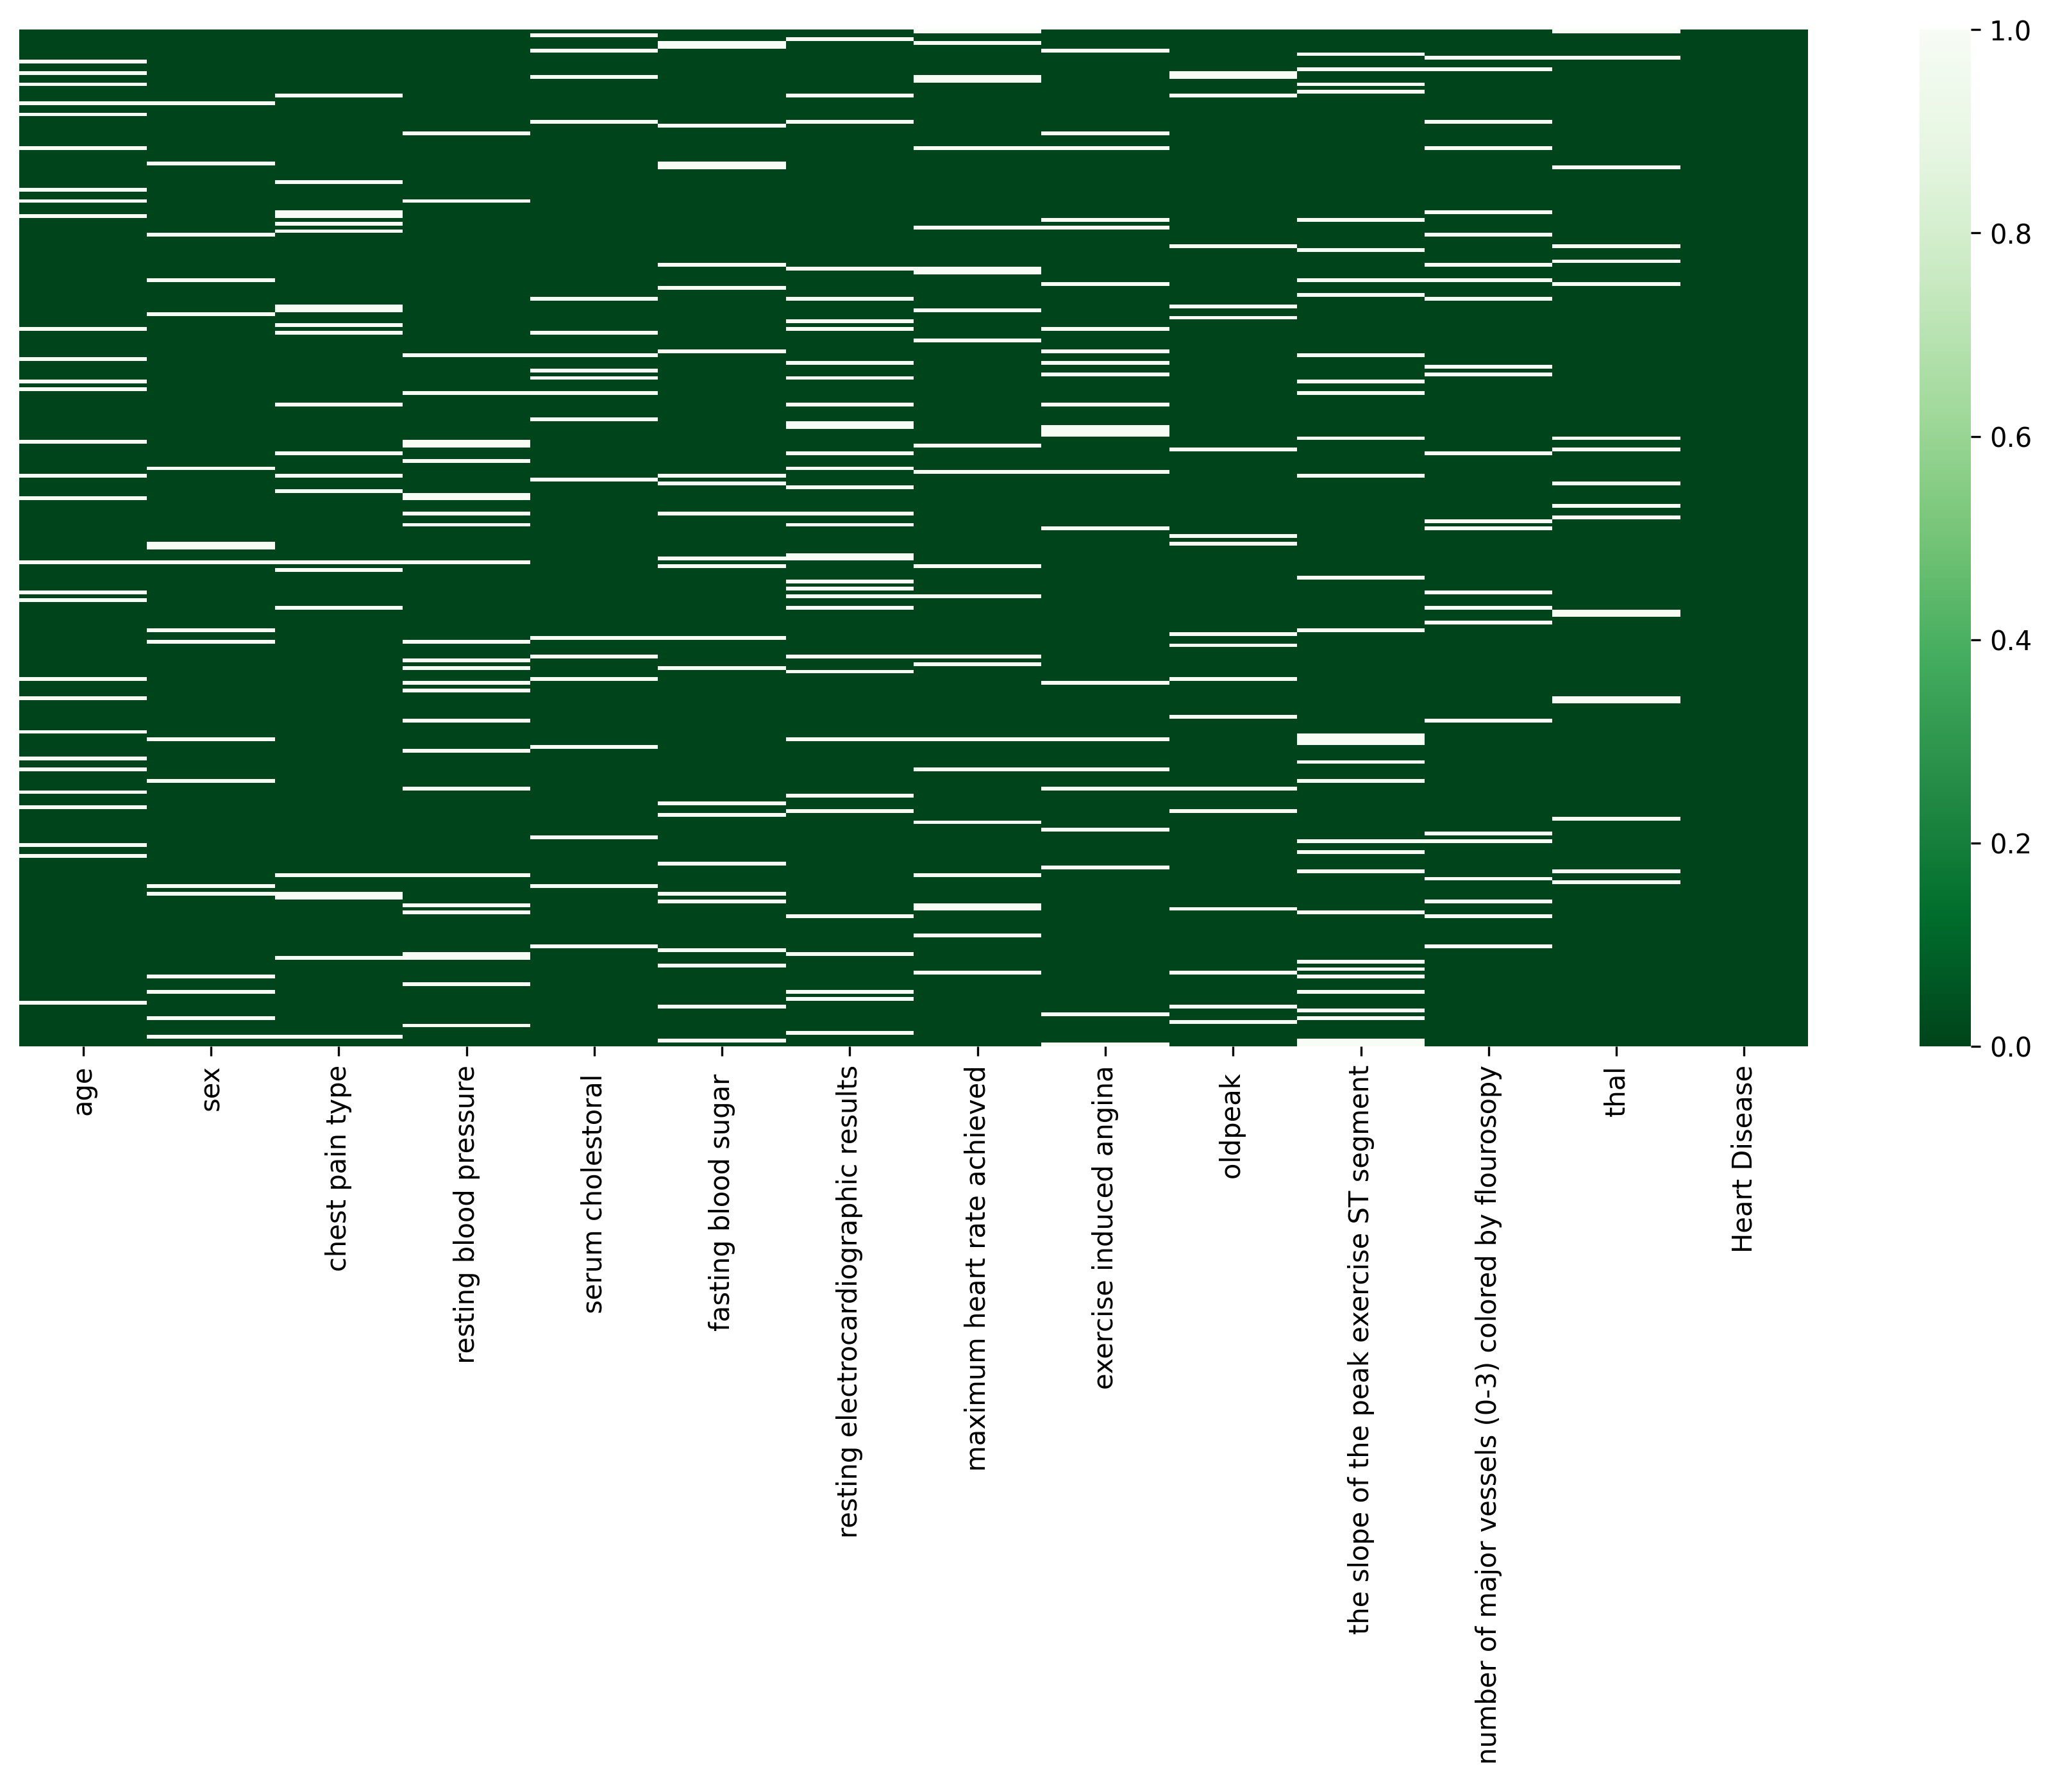

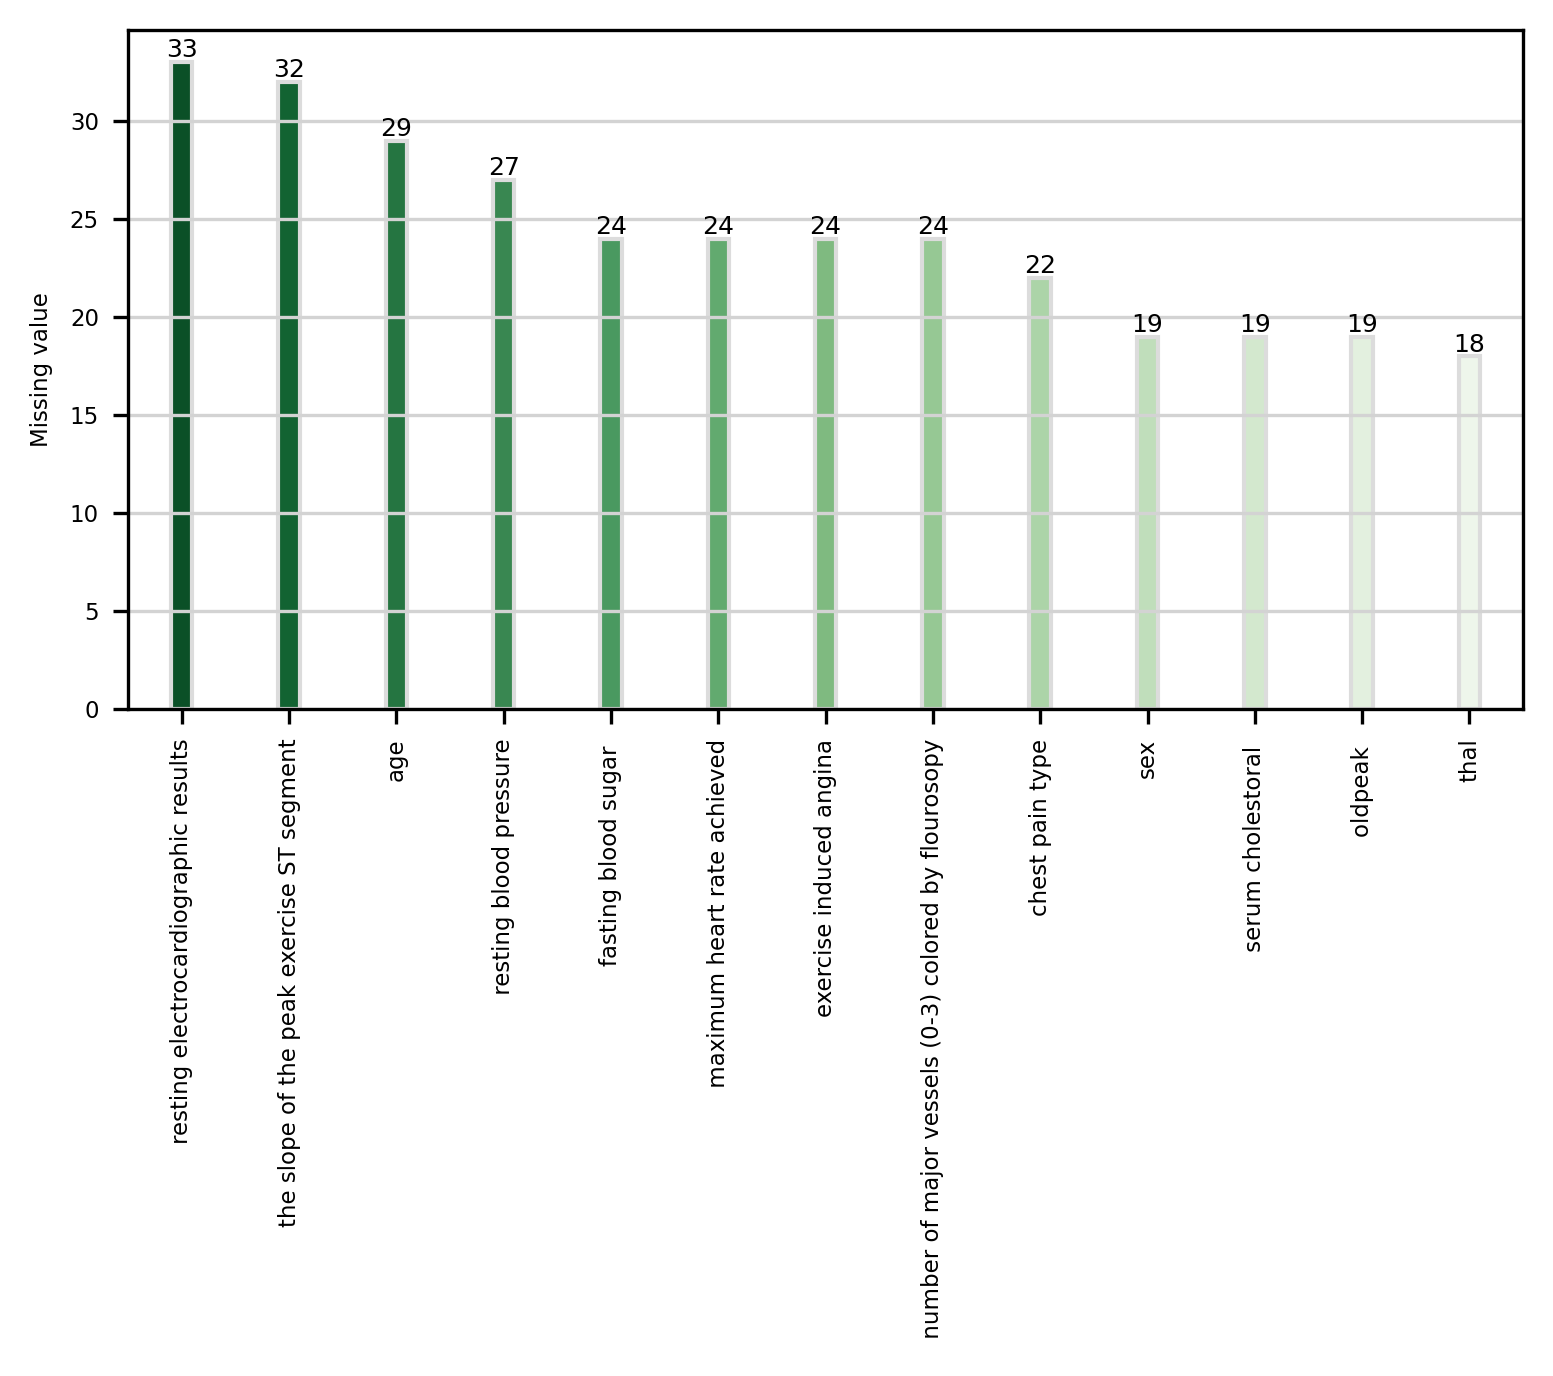

finding similar columns and tables to entity dataframe
IN FOR resting electrocardiographic results 0      2.0
1      2.0
2      NaN
3      0.0
4      2.0
      ... 
265    0.0
266    NaN
267    2.0
268    0.0
269    2.0
Name: resting electrocardiographic results, Length: 270, dtype: float64
IN FOR the slope of the peak exercise ST segment 0      2.0
1      2.0
2      1.0
3      2.0
4      1.0
      ... 
265    1.0
266    1.0
267    2.0
268    NaN
269    NaN
Name: the slope of the peak exercise ST segment, Length: 270, dtype: float64
IN FOR age 0      70.0
1      67.0
2      57.0
3      64.0
4      74.0
       ... 
265    52.0
266    44.0
267    56.0
268    57.0
269    67.0
Name: age, Length: 270, dtype: float64
IN FOR  resting blood pressure 0      130.0
1      115.0
2      124.0
3      128.0
4      120.0
       ...  
265    172.0
266    120.0
267    140.0
268    140.0
269    160.0
Name:  resting blood pressure, Length: 270, dtype: float64
IN FOR fasting blood sugar  0      0.0
1      

In [6]:
cl = kgfarm.recommend_cleaning_operations(df)

In [7]:
df = kgfarm.clean(df,cl)

en       age  sex  chest pain type   resting blood pressure   serum cholestoral   \
0    70.0  1.0              4.0                    130.0                322.0   
1    67.0  0.0              3.0                    115.0                  NaN   
2    57.0  1.0              2.0                    124.0                261.0   
3    64.0  1.0              4.0                    128.0                263.0   
4    74.0  0.0              2.0                    120.0                269.0   
..    ...  ...              ...                      ...                  ...   
265  52.0  1.0              3.0                    172.0                199.0   
266  44.0  1.0              2.0                    120.0                263.0   
267  56.0  NaN              NaN                    140.0                294.0   
268  57.0  1.0              4.0                    140.0                192.0   
269  67.0  1.0              4.0                    160.0                286.0   

     fasting blood sugar

KGFarm exploits the abstracted link between the KGLiDS graph and Farm graph
   * <code> kgfarm.recommend_feature_transformations</code> returns all possible set of feature transformations that exists in the database.
   * <b> You can pass your existing <code>entity_df</code> to <code>kgfarm.recommend_feature_transformations(entity:pd.Dataframe)</code> to look for possible feature transformations for that very entity dataframe.

In [8]:
dependent_variable = 'Heart Disease'
independent_variables = [feature for feature in list(df.columns) if feature != dependent_variable]

X = df[independent_variables]
y = df[dependent_variable]

In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=1000)
lrc = LogisticRegression()

In [11]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(lrc, X, y, cv = 10, scoring='f1').mean()
scores

0.7792026253316575